# Import needed library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt

In [ ]:
try:
    df = pd.read_csv("/content/drive/MyDrive/MAI/insurance.csv")
except Exception as e:
    print(f"Lỗi {e}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Chỉ chọn các cột số, bỏ qua cột 'charges'
df_numeric = df.select_dtypes(include=['number']).drop(columns=['charges'], errors='ignore')

# Tính quantile
Q1 = df_numeric.quantile(0.25)
Q2 = df_numeric.quantile(0.50)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm outliers cho từng cột số
def detect_outliers(df, lower_bound, upper_bound):
    outliers = {}
    for column in df.columns:
        if column in lower_bound and column in upper_bound:
            outliers[column] = df[(df[column] < lower_bound[column]) | (df[column] > upper_bound[column])][column].values
    return outliers

outliers = detect_outliers(df_numeric, lower_bound, upper_bound)

# In kết quả
print("Q1:\n", Q1)
print("Q2 (Median):\n", Q2)
print("Q3:\n", Q3)
print("IQR:\n", IQR)
print("Outliers:\n", outliers)

Q1:
 age         27.00000
bmi         26.29625
children     0.00000
Name: 0.25, dtype: float64
Q2 (Median):
 age         39.0
bmi         30.4
children     1.0
Name: 0.5, dtype: float64
Q3:
 age         51.00000
bmi         34.69375
children     2.00000
Name: 0.75, dtype: float64
IQR:
 age         24.0000
bmi          8.3975
children     2.0000
dtype: float64
Outliers:
 {'age': array([], dtype=int64), 'bmi': array([49.06, 48.07, 47.52, 47.41, 50.38, 47.6 , 52.58, 47.74, 53.13]), 'children': array([], dtype=int64)}


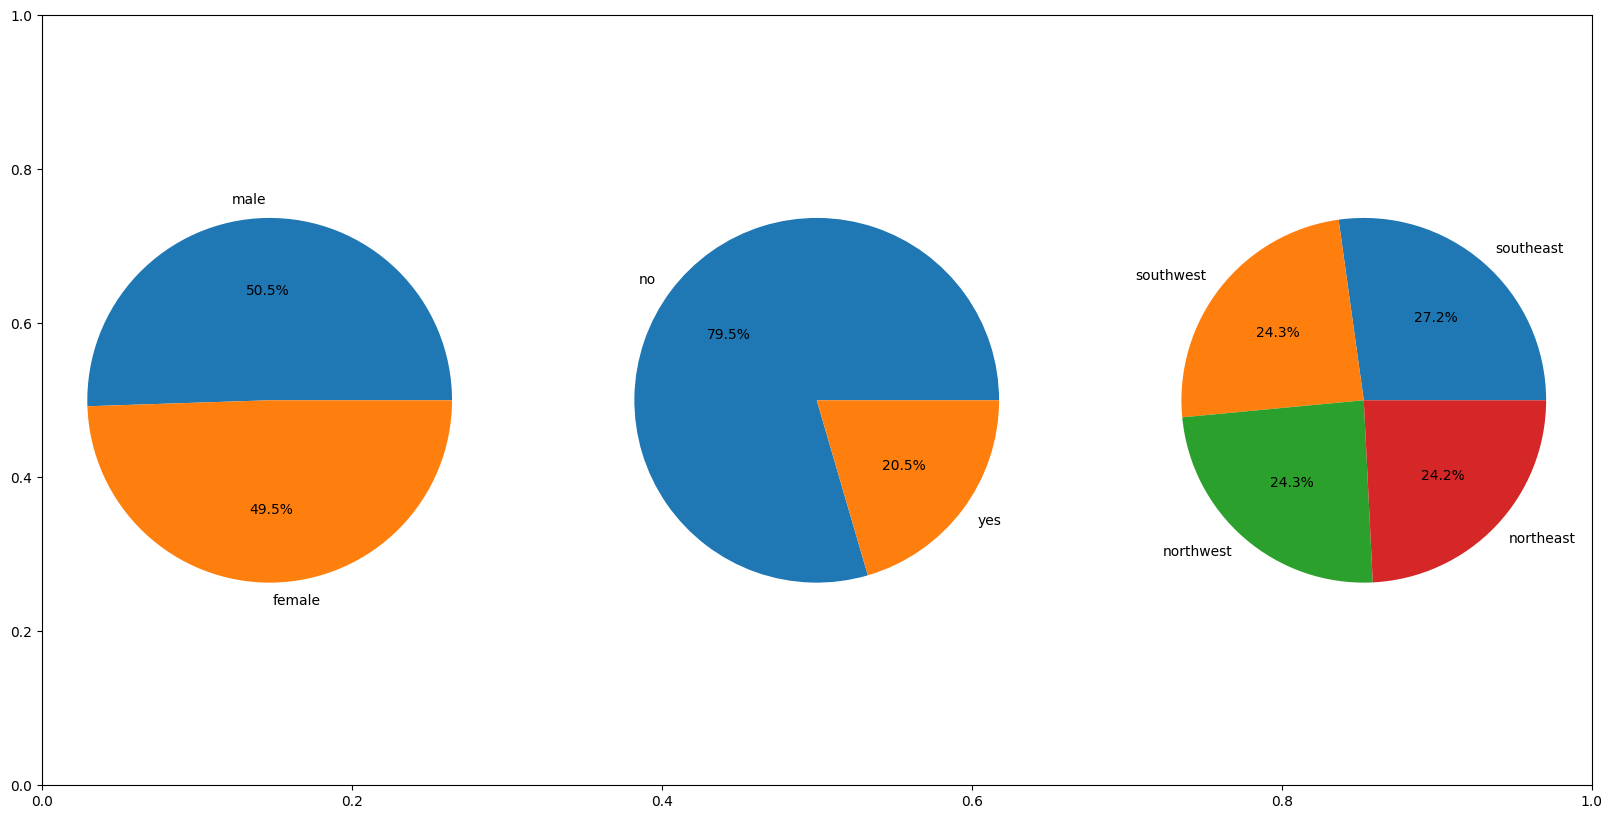

In [ ]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

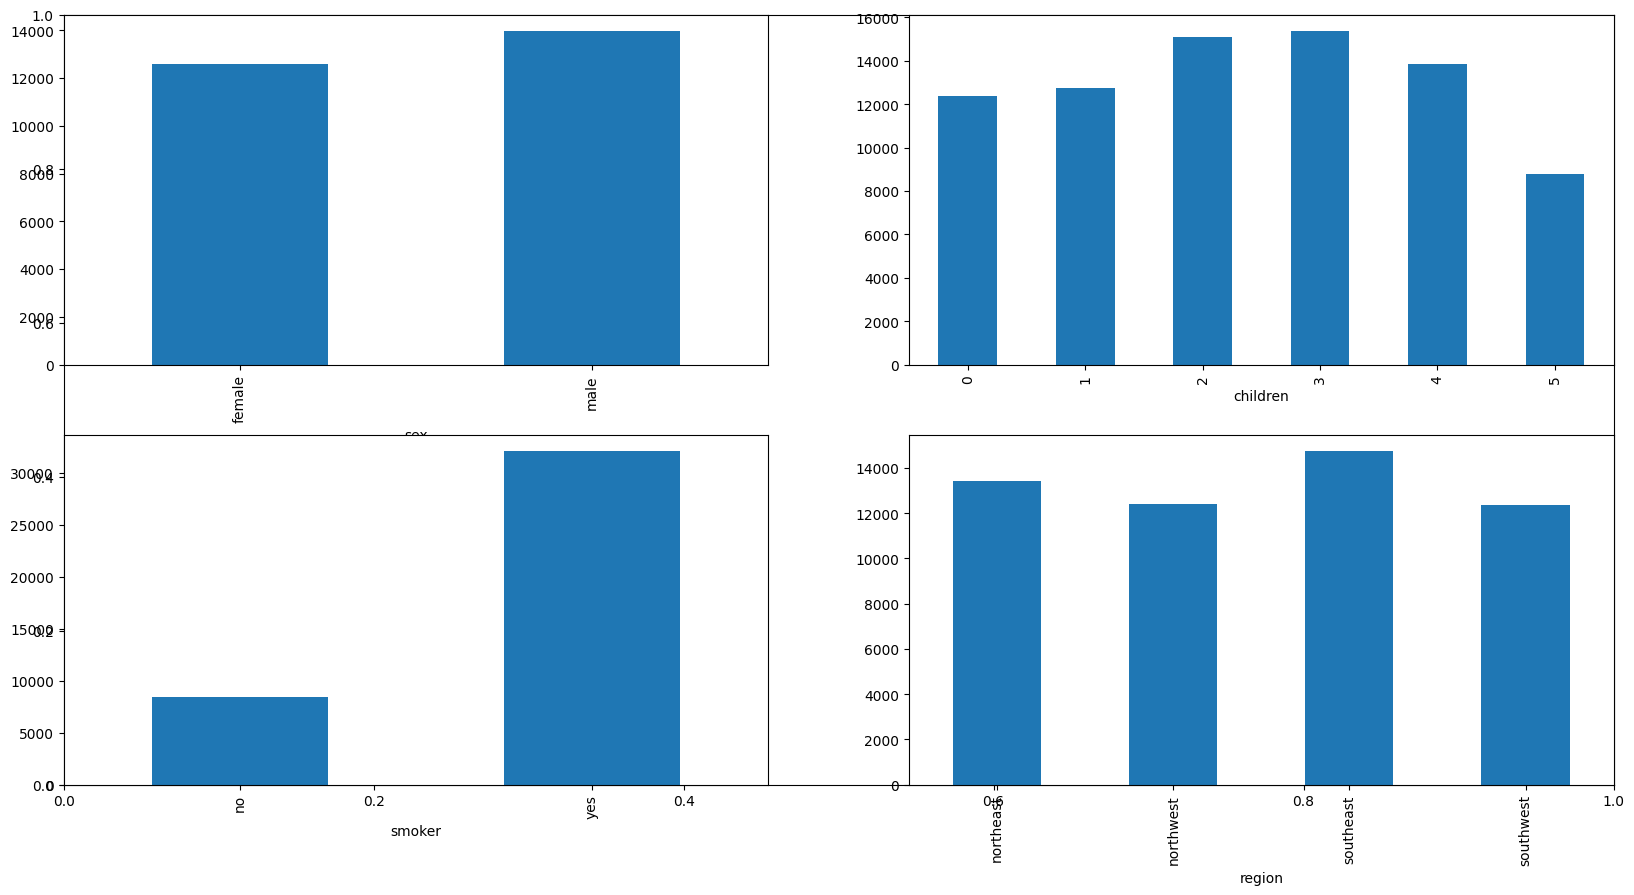

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

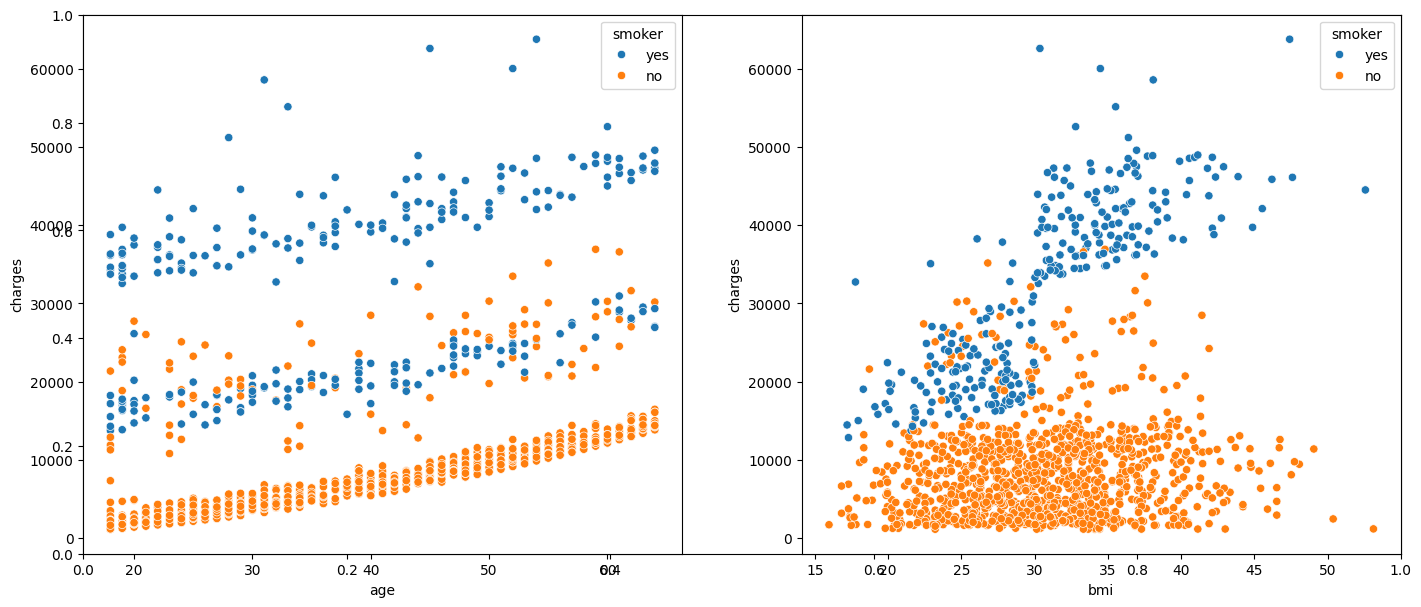

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

### Data preprocessing

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,0,21984.47061
4,32,1,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,0,10600.54830
1334,18,0,31.920,0,0,1,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Linear regression model

In [ ]:
X = df.drop(['charges'],axis=1)
Y = df['charges']

In [ ]:
X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std
Y_mean = Y.mean()
Y_std = Y.std()
Y = (Y - Y_mean) / Y_std

In [ ]:
# Thêm cột bias
X.insert(0, 'bias', 1)
X = X.values
X

array([[ 1.        , -1.43987895,  1.0093933 , ..., -0.90889407,
         1.96892365,  1.34266031],
       [ 1.        , -1.51108205, -0.98995313, ..., -0.07941191,
        -0.50751184,  0.43785344],
       [ 1.        , -0.79905107, -0.98995313, ...,  1.57955243,
        -0.50751184,  0.43785344],
       ...,
       [ 1.        , -1.51108205,  1.0093933 , ..., -0.90889407,
        -0.50751184,  0.43785344],
       [ 1.        , -1.29747276,  1.0093933 , ..., -0.90889407,
        -0.50751184,  1.34266031],
       [ 1.        ,  1.55065116,  1.0093933 , ..., -0.90889407,
         1.96892365, -1.37176031]])

In [ ]:
Y

,charges
0,0.297745
1,-0.954024
2,-0.729100
3,0.718835
4,-0.777208
...,...
1333,-0.221180
1334,-0.914353
1335,-0.961927
1336,-0.930705


### Model

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

number_columns = X_train.shape[1]
beta = np.zeros(number_columns) # Tạo ma trận chứa các giá trị intercept và slope ở beta[0]
y_mean = np.mean(Y_train) # Tính giá trị trung bình của Y trên train

for i in range(1, number_columns):
    x_i = X_train[:, i]
    x_mean = np.mean(x_i)
    Sxx = np.sum((x_i - x_mean) ** 2)
    Sxy = np.sum((x_i - x_mean) * (Y_train - y_mean))
    beta[i] = Sxy / Sxx

beta[0] = y_mean - np.sum(beta[1:] * np.mean(X_train[:, 1:], axis=0))

Y_pred_test = np.dot(X_test, beta)
Y_pred_train = np.dot(X_train, beta)

SSt_test = np.sum((Y_test - np.mean(Y_test)) ** 2)
SSe_test = np.sum((Y_test - Y_pred_test) ** 2)
R2_test = 1 - (SSe_test / SSt_test)

SSt_train = np.sum((Y_train - np.mean(Y_train)) ** 2)
SSe_train = np.sum((Y_train - Y_pred_train) ** 2)
R2_train = 1 - (SSe_train / SSt_train)

MSE_test = (np.sum(Y_test - Y_pred_test) ** 2) / len(Y_test)
MSE_train = (np.sum(Y_train - Y_pred_train) ** 2) / len(Y_train)

MAE_test = (np.sum(np.abs(Y_test - Y_pred_test))) / len(Y_test)
MAE_train = (np.sum(np.abs(Y_train - Y_pred_train))) / len(Y_train)

print(f"hệ số hồi quy: {beta}")
print(f"R2 trên tập train {R2_train}, R2 trên tập test {R2_test}")
print(f"MSE trên tập train {MSE_train}, MSE trên tập test {MSE_test}")
print(f"MAE trên tập train {MAE_train}, MAE trên tập test {MAE_test}")

hệ số hồi quy: [-0.00803572  0.28094575 -0.05817672  0.17387571  0.08405453  0.75481996
  0.02376708]
R2 trên tập train 0.7222374472146061, R2 trên tập test 0.7933882108542443
MSE trên tập train 1.4463679833799656e-29, MSE trên tập test 0.43070305656776914
MAE trên tập train 0.3607968596784015, MAE trên tập test 0.36908086146874297


## Gradient Descent

In [ ]:
number_columns = X_train.shape[1]
beta = np.zeros(number_columns)
learning_rate = 0.01
epochs = 1000
m = len(X_train)

# Gradient Descent
for epoch in range(epochs):
    Y_pred_train = np.dot(X_train, beta)
    error = Y_pred_train - Y_train
    gradient = (1/m) * np.dot(X_train.T, error)
    beta -= learning_rate * gradient

# Dự đoán
Y_pred_test = np.dot(X_test, beta)
Y_pred_train = np.dot(X_train, beta)

# Chuyển Y_pred về đơn vị gốc
Y_pred_test_original = (Y_pred_test * Y_std) + Y_mean
Y_pred_train_original = (Y_pred_train * Y_std) + Y_mean

# Đánh giá mô hình
SSt_test = np.sum((Y_test - np.mean(Y_test)) ** 2)
SSe_test = np.sum((Y_test - Y_pred_test) ** 2)
R2_test = 1 - (SSe_test / SSt_test)

SSt_train = np.sum((Y_train - np.mean(Y_train)) ** 2)
SSe_train = np.sum((Y_train - Y_pred_train) ** 2)
R2_train = 1 - (SSe_train / SSt_train)

MSE_test = (np.sum(Y_test - Y_pred_test) ** 2) / len(Y_test)
MSE_train = (np.sum(Y_train - Y_pred_train) ** 2) / len(Y_train)

MAE_test = (np.sum(np.abs(Y_test - Y_pred_test))) / len(Y_test)
MAE_train = (np.sum(np.abs(Y_train - Y_pred_train))) / len(Y_train)

print(f"Hệ số hồi quy sau chuẩn hóa: {beta}")
print(f"R2 trên tập train: {R2_train}, R2 trên tập test: {R2_test}")
print(f"MSE trên tập train {MSE_train}, MSE trên tập test {MSE_test}")
print(f"MAE trên tập train {MAE_train}, MAE trên tập test {MAE_test}")

Hệ số hồi quy sau chuẩn hóa: [ 3.92098059e-03  2.98036279e-01 -7.18921781e-04  1.67694905e-01
  4.21333045e-02  7.88605156e-01 -1.79990978e-02]
R2 trên tập train: 0.7414104450268924, R2 trên tập test: 0.7826894534610932
MSE trên tập train 5.983146306230251e-12, MSE trên tập test 0.10270227542580602
MAE trên tập train 0.347995459950586, MAE trên tập test 0.3465853482637321


### Evaluate model

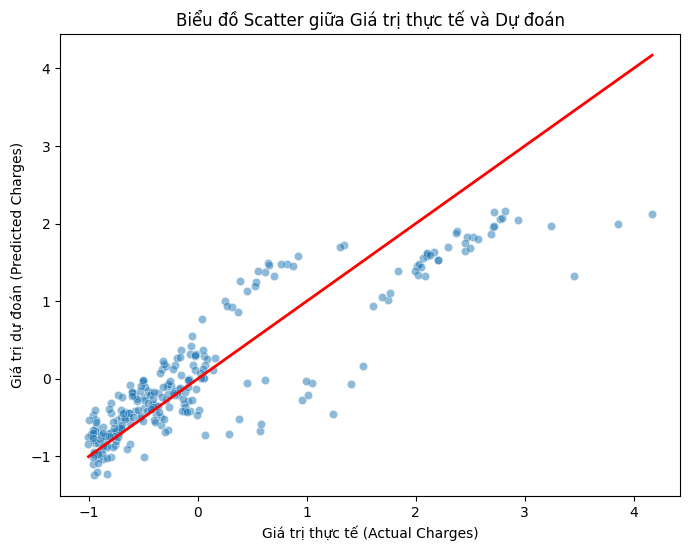

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred_test, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r', linewidth=2)  # Đường y=x
plt.xlabel("Giá trị thực tế (Actual Charges)")
plt.ylabel("Giá trị dự đoán (Predicted Charges)")
plt.title("Biểu đồ Scatter giữa Giá trị thực tế và Dự đoán")
plt.show()

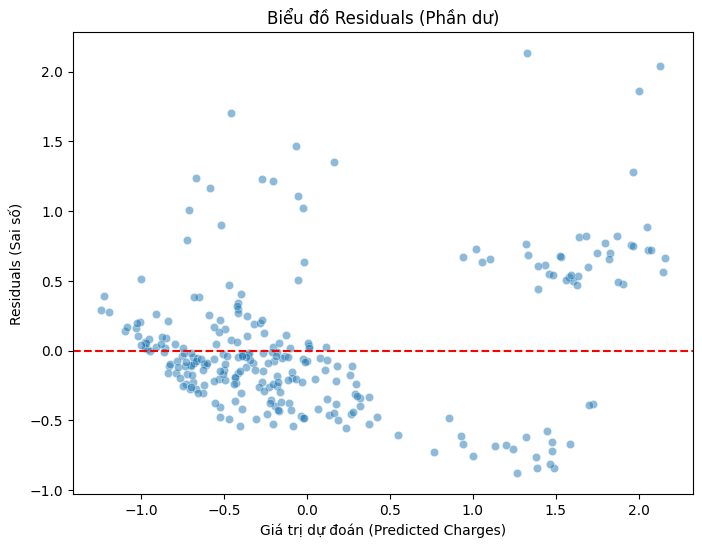

In [ ]:
residuals = Y_test - Y_pred_test

plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_pred_test, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Đường zero
plt.xlabel("Giá trị dự đoán (Predicted Charges)")
plt.ylabel("Residuals (Sai số)")
plt.title("Biểu đồ Residuals (Phần dư)")
plt.show()


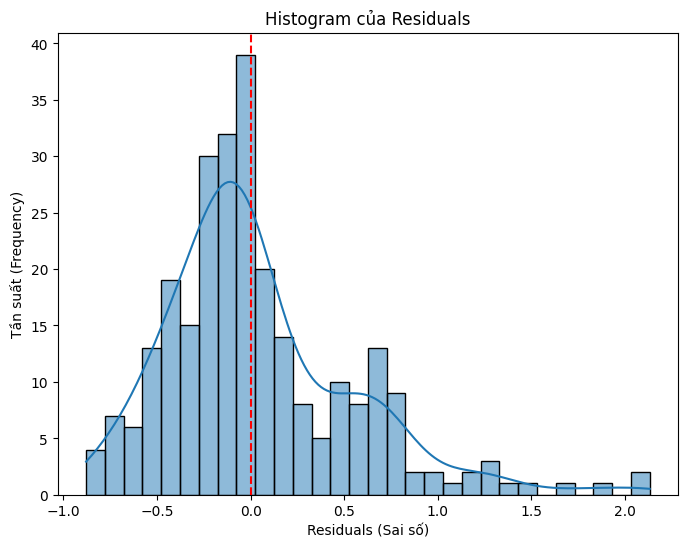

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(x=0, color='r', linestyle='--')  # Đường zero
plt.xlabel("Residuals (Sai số)")
plt.ylabel("Tần suất (Frequency)")
plt.title("Histogram của Residuals")
plt.show()


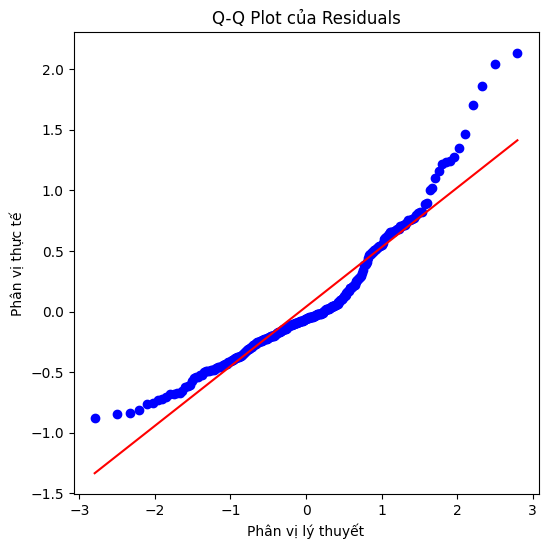

In [ ]:
np.random.seed(42)
import scipy.stats as stats
# Vẽ Q-Q Plot
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.get_lines()[1].set_color('red')  # Đường chuẩn màu đỏ
ax.set_title("Q-Q Plot của Residuals")
ax.set_xlabel("Phân vị lý thuyết")
ax.set_ylabel("Phân vị thực tế")
plt.show()

In [ ]:
# Hàm dự đoán với dữ liệu mới
def predict_new_data(new_data):
    new_data = np.array(new_data, dtype=float)

    # Chuẩn hóa dữ liệu đầu vào giống như khi training
    new_data = (new_data - X_mean.values) / X_std.values

    # Thêm hệ số bias = 1 vào đầu
    new_data = np.insert(new_data, 0, 1)

    # Tính dự đoán
    prediction_zscore = np.dot(new_data, beta)

    # Chuyển dự đoán về đơn vị gốc
    prediction_original = (prediction_zscore * Y_std) + Y_mean

    return prediction_original


# Ví dụ: Nhập dữ liệu đầu vào mới (age, sex, bmi, children, smoker, region)
example_input = [33, 0, 22.705, 0, 0, 0]  # Tuỳ chỉnh giá trị theo yêu cầu
predicted_charge = predict_new_data(example_input)
print(f"Dự đoán chi phí bảo hiểm: {predicted_charge}")


Dự đoán chi phí bảo hiểm: 3636.042826602381


In [ ]:
df.charges[0]

np.float64(16884.924)

In [ ]:
# df['sex']=df['sex'].map({'male':1,'female':0})
# df['smoker']=df['smoker'].map({'yes':1,'no':0})
# df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})
# 28870.48539579867